<a href="https://colab.research.google.com/github/Nilayatabek/-devler/blob/main/mincost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import networkx as nx
import matplotlib.pyplot as plt


In [2]:
# Arz düğümü
supply = {
    "P": 20000   # Avrupa Dağıtım Merkezi
}

# Talep düğümleri (Türkiye'nin 7 bölgesi)
demand = {
    "Marmara": 5000,
    "Ege": 3500,
    "İç Anadolu": 4000,
    "Akdeniz": 3000,
    "Karadeniz": 2000,
    "Doğu Anadolu": 1500,
    "Güneydoğu Anadolu": 1000
}

# Distribütörler (ara düğümler)
distributors = ["D1", "D2"]

# 🔧 Dummy düğüm (ağ esnekliği için)
dummy = "Dummy"


In [3]:
G = nx.DiGraph()

# ---- Arz tanımı
G.add_node("P", demand=-20000)

# ---- Distribütörler (0 net talep)
for d in distributors:
    G.add_node(d, demand=0)

# ---- Talep düğümleri
for r, d in demand.items():
    G.add_node(r, demand=d)

# ---- Dummy node (fazla akış için)
G.add_node(dummy, demand=0)


In [4]:
# P → Distribütör
G.add_edge("P", "D1", weight=3, capacity=12000)
G.add_edge("P", "D2", weight=5, capacity=10000)

# D1 → Bölgeler
G.add_edge("D1", "Marmara", weight=1, capacity=5000)
G.add_edge("D1", "Ege", weight=1, capacity=3500)
G.add_edge("D1", "İç Anadolu", weight=2, capacity=4000)
G.add_edge("D1", "Akdeniz", weight=4, capacity=2000)
G.add_edge("D1", "Karadeniz", weight=4, capacity=1500)

# D2 → Bölgeler
G.add_edge("D2", "Akdeniz", weight=2, capacity=3000)
G.add_edge("D2", "Karadeniz", weight=3, capacity=2000)
G.add_edge("D2", "Doğu Anadolu", weight=2, capacity=1500)
G.add_edge("D2", "Güneydoğu Anadolu", weight=2, capacity=1000)
G.add_edge("D2", "İç Anadolu", weight=4, capacity=2000)

# Dummy bağlantıları (yüksek maliyetle – son çare yolu)
for d in distributors:
    G.add_edge(d, dummy, weight=20, capacity=5000)


In [5]:
flow_dict = nx.min_cost_flow(G)
cost = nx.cost_of_flow(G, flow_dict)

print("Toplam minimum maliyet:", cost)


Toplam minimum maliyet: 110500


In [6]:
print("\nOptimal Akışlar (sadece >0 olanlar):\n")

for u in flow_dict:
    for v, f in flow_dict[u].items():
        if f > 0:
            print(f"{u} → {v} : {f} birim")



Optimal Akışlar (sadece >0 olanlar):

P → D1 : 12000 birim
P → D2 : 8000 birim
D1 → Marmara : 5000 birim
D1 → Ege : 3500 birim
D1 → İç Anadolu : 3500 birim
D2 → Akdeniz : 3000 birim
D2 → Karadeniz : 2000 birim
D2 → Doğu Anadolu : 1500 birim
D2 → Güneydoğu Anadolu : 1000 birim
D2 → İç Anadolu : 500 birim


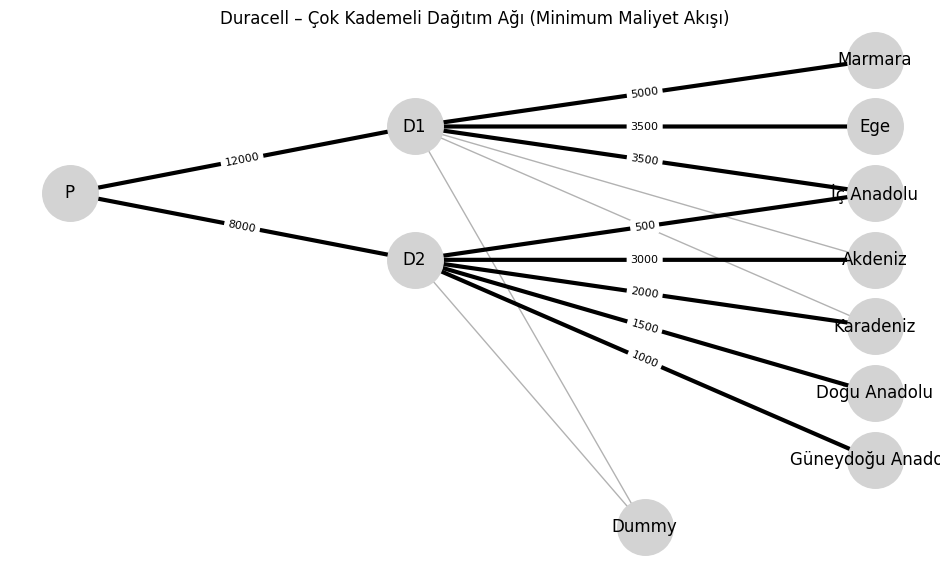

In [7]:
plt.figure(figsize=(12, 7))

pos = {
    "P": (0, 2),
    "D1": (3, 3),
    "D2": (3, 1),

    "Marmara": (7, 4),
    "Ege": (7, 3),
    "İç Anadolu": (7, 2),
    "Akdeniz": (7, 1),
    "Karadeniz": (7, 0),
    "Doğu Anadolu": (7, -1),
    "Güneydoğu Anadolu": (7, -2),

    "Dummy": (5, -3)
}

# Node çizimi
nx.draw_networkx_nodes(G, pos, node_size=1600, node_color="lightgrey")

# Edge çizimi (akış varsa kalın)
for u, v in G.edges():
    flow = flow_dict[u][v]
    if flow > 0:
        nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], width=3)
    else:
        nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], alpha=0.3)

# Etiketler
labels = {n: n for n in G.nodes()}
nx.draw_networkx_labels(G, pos, labels)

# Akış etiketleri
flow_labels = {
    (u, v): flow_dict[u][v]
    for u in flow_dict for v in flow_dict[u]
    if flow_dict[u][v] > 0
}
nx.draw_networkx_edge_labels(G, pos, edge_labels=flow_labels, font_size=8)

plt.title("Duracell – Çok Kademeli Dağıtım Ağı (Minimum Maliyet Akışı)")
plt.axis("off")
plt.show()
